In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from scipy.stats import linregress

In [3]:
data = pd.read_csv('tip_dataset.csv')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
print(data.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [6]:
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


EDA Analysis to find the linearity of the data set and analyze the
relationship between the target variable and predictors. 

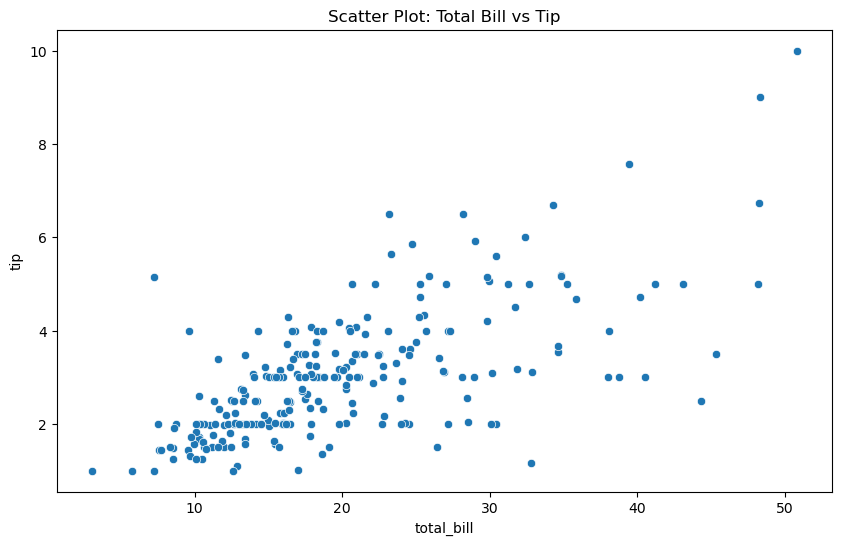

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

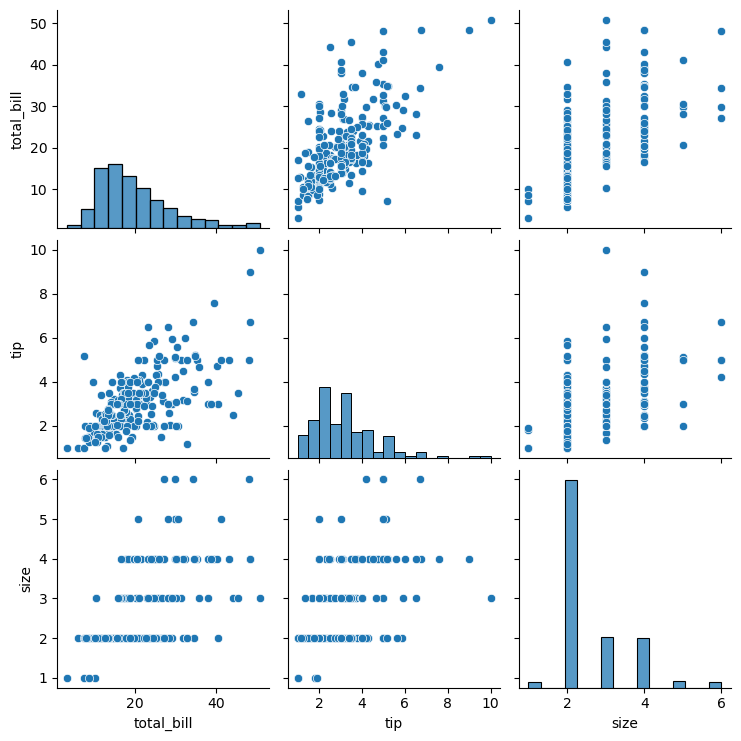

In [13]:
# Pair Plot (Numerical Variables Only)
sns.pairplot(data[['total_bill', 'tip', 'size']])
plt.show()

In [23]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


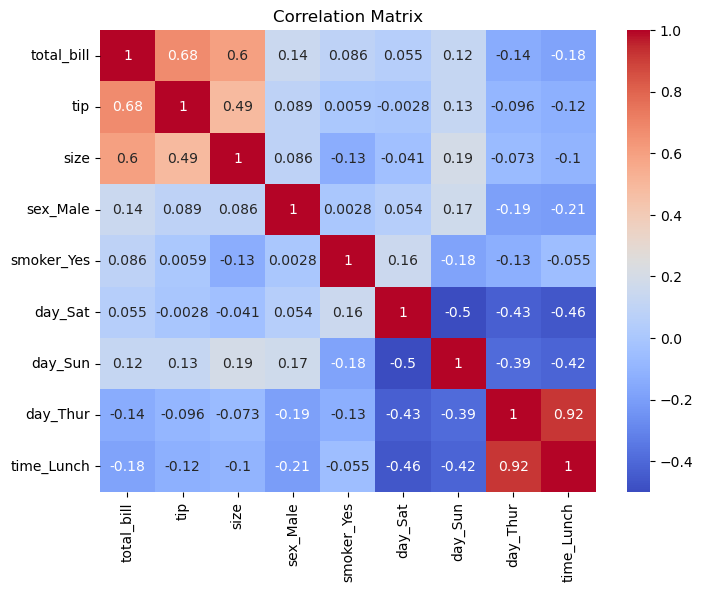

In [24]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Rainbow Test for Linearity
X = data[['total_bill', 'size']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = data['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = sm.stats.linear_rainbow(model)
print("Rainbow test statistic:", rainbow_statistic)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test statistic: 1.1902656646832823
Rainbow test p-value: 0.1704893569344739


Based on the above analysis it suggests the data set follows linear trend

In [45]:
# Split the data into train and test sets
X = data.drop(columns=['tip'])
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Scale features for models that are sensitive to feature scales (SVR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression:
Fits a straight line through the data.

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.5545031052534979


Ridge Regression :
Like linear regression but with an L2 regularization term to reduce overfitting

In [47]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.5701450721913534


Lasso Regression:
Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

In [48]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression R2: 0.5857517148874801


Decision Tree Regression:
Splits data into regions with similar values, capturing non-linear relationships.

In [58]:
tree_reg = DecisionTreeRegressor(random_state=100)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))


Decision Tree R2: 0.035785553153013905


Ensemble Method (Random Forest Regression):
An ensemble of decision trees that improves stability and accuracy

In [59]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.6250514490174102


Support Vector Regression (SVR):
Uses kernels to fit complex patterns.

In [62]:
# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Train the SVR model
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions and inverse scaling to original scale
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

# Evaluation
print('SVR R2 Score:', r2_score(y_test, y_pred_svr))

SVR R2 Score: 0.5573042694449382


K-Nearest Neighbors (KNN) Regression:
Predicts the target by averaging the values of the closest data points.

In [63]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.42580082952102194


Plots

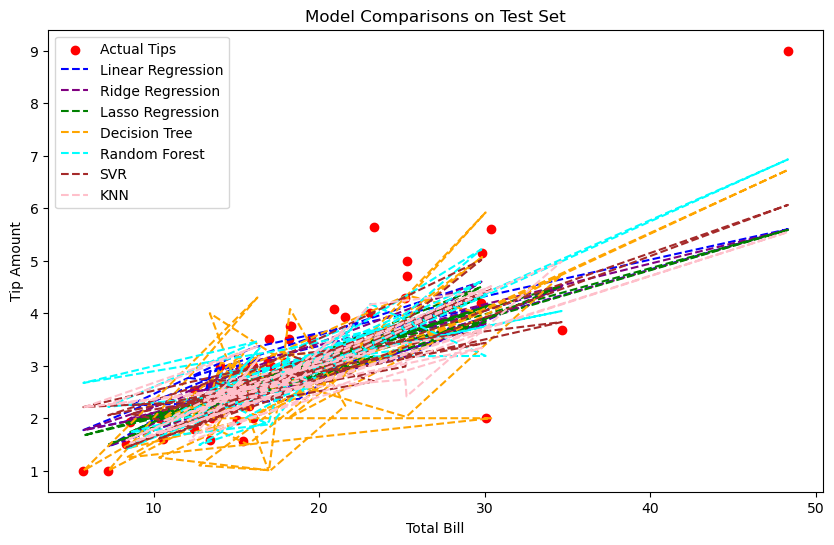

In [65]:
# Select a single feature (e.g., total_bill) from X_test
X_test_total_bill = X_test['total_bill'] if 'total_bill' in X_test.columns else X_test.iloc[:, 0]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_total_bill, y_test, color='red', label='Actual Tips')

# Plot predictions from each model
plt.plot(X_test_total_bill, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test_total_bill, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test_total_bill, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test_total_bill, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test_total_bill, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test_total_bill, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test_total_bill, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()


Check for whole data

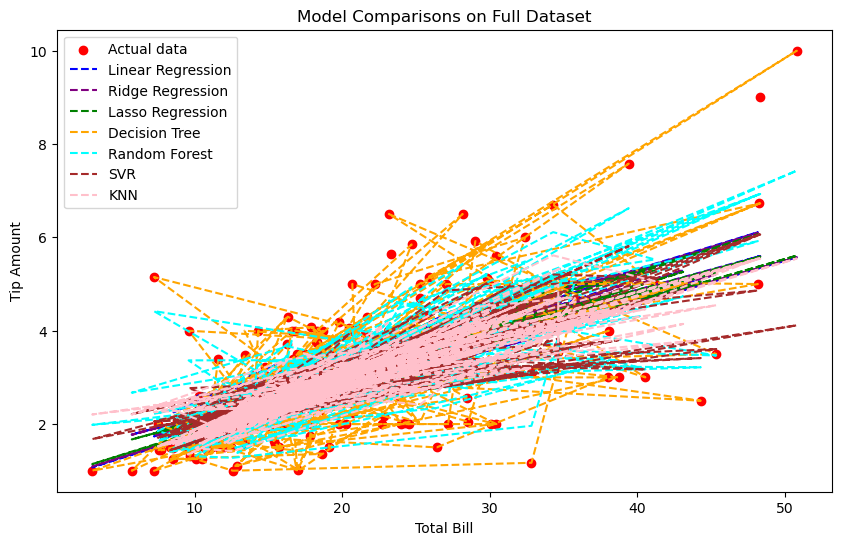

In [68]:
# Select a single feature for plotting, e.g., `total_bill`
X_feature = X['total_bill'] if 'total_bill' in X.columns else X.iloc[:, 0]

# Train models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

# For SVR, use scaled data
X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_feature, y, color='red', label='Actual data')

# Plot each model's predictions against `X_feature`
plt.plot(X_feature, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_feature, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_feature, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_feature, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_feature, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_feature, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_feature, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()


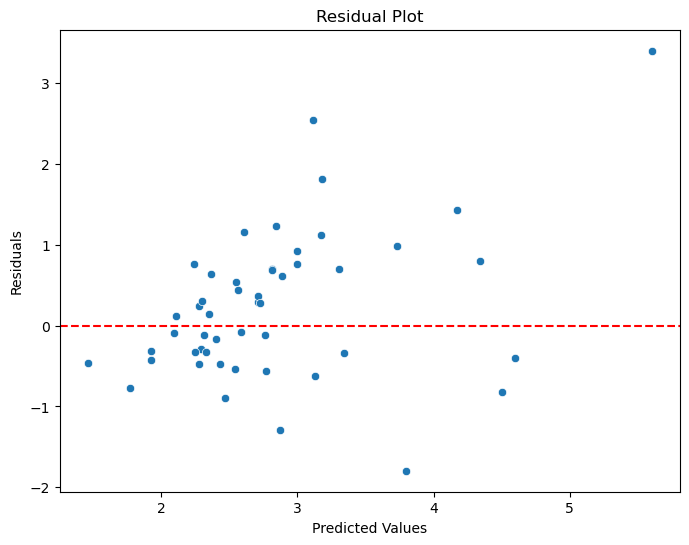

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
